In [17]:
import torch
from torch import distributions
from matplotlib import pyplot as plt

# univariate gaussian单变量高斯分布

In [ ]:
#Univariate Gaussian with mean 0,std 1
mean = torch.zeros(1,requires_grad = True)
std = torch.ones(1,requires_grad = True)
gaussian = distributions.Normal(mean , std)


对distribution最常见的operation是sample和log_prob
log_prob对数概率：数值稳定性 + 优化便利性

In [ ]:
sample = gaussian.sample((1,))
#采一个样本
print(sample)

tensor([[-0.1033]])


In [7]:
log_prob = gaussian.log_prob(sample)
print(log_prob)

tensor([[-0.9243]], grad_fn=<SubBackward0>)


In [8]:
loss = -log_prob.sum()

In [9]:
loss.backward()

populate gradient
计算并填入梯度
计算backpropagation
填入 将计算出的数值写入参数对应的.grad属性中

In [10]:
print(mean.grad)

tensor([0.1033])


对于normal distribution
损失函数对均值的梯度为 miu - x
miu = 0是，即为 -x

In [12]:
mean = torch.zeros(10)
std = torch.ones(10)
gaussian = distributions.Normal(mean,std)

batch-wise distribution
批量分布
以后，一次性处理一组分布

In [13]:
print(gaussian)
print(gaussian.batch_shape)

Normal(loc: torch.Size([10]), scale: torch.Size([10]))
torch.Size([10])


In [14]:
sample = gaussian.sample((3,))
print(sample)

tensor([[-0.0482, -0.4057, -1.2409,  0.0531, -0.1656,  0.2953,  0.5389, -2.1874,
         -0.8277,  1.6163],
        [-0.5372,  1.0437, -0.6367,  0.3122, -1.2616, -0.9845,  1.0414, -0.3901,
         -1.0781,  0.5599],
        [-1.8753,  0.7291,  0.1135,  0.6675,  0.4180,  0.7189,  0.7901, -1.0611,
          0.2819,  1.3565]])


In [15]:
gaussian.log_prob(sample)

tensor([[-0.9201, -1.0012, -1.6889, -0.9204, -0.9326, -0.9625, -1.0641, -3.3113,
         -1.2615, -2.2251],
        [-1.0632, -1.4636, -1.1216, -0.9677, -1.7147, -1.4035, -1.4612, -0.9950,
         -1.5001, -1.0757],
        [-2.6773, -1.1848, -0.9254, -1.1417, -1.0063, -1.1774, -1.2311, -1.4819,
         -0.9587, -1.8391]])

# multivariate Normal 多变量高斯
变量不独立，协方差矩阵描述关联，各自服从正态分布


In [16]:
mean = torch.zeros(2)
#包含2个0的一维张量[0.,0.] 分布的中心点
#定义分布的中心点
covariance = torch.tensor(
    [[1,0.8],
     [0.8,1]]
)
gaussian = distributions.MultivariateNormal(mean,covariance)
#实例化一个正态分布对象
#从而可以采样.sample 或者 计算概率密度 .log_prob


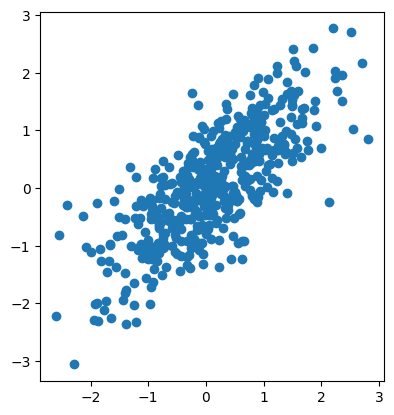

In [18]:
samples = gaussian.sample((500,))
# sample 500次
# 由于分布是二元的，故每个样本都有2个值
#结果形状 torch.Size([500,2])
plt.gca().set_aspect("equal")
#强制让X轴和Y轴的比例尺保持一致
#.gca() get current axes获取当前坐标轴对象（句柄）
#.set_aspect() 设置长宽比
plt.scatter(samples[:,0].numpy(),samples[:,1].numpy())
#.scatter() 画散点图
#samples[:,0] 切片操作 取所有样本，所有行，第0列数据 （x坐标）
#.numpy() 将张量转换为NumPy数组 matplotlib不能读懂pythorch的tensor格式

distribution有3个shape

## sample_shape
采样形状 对每个分布进行多少次独立重复实验
由.sample()的传参决定

.sample()默认采1次 sample_shape = []
.sample((500,))采500次 sample_shape = [500]
.sample((4,5))采4*5 grid次 sample_shape =[4,5] (请求了20个样本，并排成一个4行5列矩阵)
## batch_shape
多少个互相独立的分布在同时运行
用来并行计算
## event_shape
事件形状 单个样本本身的形状
univariate normal -- event_shape=[]
multivariate nromal -- =[2]
image distribution -- =[28,28]  对于28*28的图像


tensor的形状为三者的拼接
result_shape = sample_shape + batch_shape + event_shape



In [ ]:
mean = torch.zeros(2)
#形状是2 表示中心点在(0,0)
covariance = torch.tensor(
    [
        [[1,0.8],
         [0.8,2]],
        [[1,-0.2],
          [-0.2,1]],
        [[4,0.6],
         [0.6,0.5]]
    ]
)
#3个独立的协方差矩阵 2*2矩阵描述二元分布关系 
gaussian = distributions.MultivariateNormal(mean,covariance)
#使用了广播broadcast机制
#pytorch最终理解的mean是
"""
mean = torch.tensor([
    [0,0],
    [0,0],
    [0,0]
])

"""

sample = gaussian.sample((5,))
#5次采样

print(gaussian.batch_shape)
#3个分布
print(gaussian.event_shape)
#每个点2个坐标
print(sample.shape[0])


torch.Size([3])
torch.Size([2])
5


# categorical distribution

In [ ]:
probs = torch.tensor([0.1,0.2,0.7])
# 定义3个选项的中奖率（和为1）
#对应policy network策略网络输出的动作概率
dist = distributions.Categorical(probs = probs)
#创建分布对象 -- 抽奖转盘


sample = dist.sample([20])
#转20次转盘
#返回中奖的编号选项
#Agent在那一刻决定执行的动作 action
print(sample)


tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1])


In [ ]:
dist.log_prob(sample)
#计算ln(prob)

tensor([-0.3567, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567, -0.3567,
        -0.3567, -0.3567, -0.3567, -1.6094, -0.3567, -0.3567, -0.3567, -0.3567,
        -0.3567, -2.3026, -0.3567, -1.6094])

# distribution in neural nets

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [24]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size , 32)
        self.fc2 = nn.Linear(32,32)
        self.fc3 = nn.Linear(32, output_size)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
mean_network = Net(1,1) 
#input_size =1 ,output_size =1 接受1个特征作为输入，最后输出一个数值
x = torch.randn(100,1)
#为了创建100个独立的正态分布，输入100个随机数
mean = mean_network(x)
#拿到的是forward的return值
#用来预测高斯分布的中心
distribution = distributions.Normal(mean , scale =1)
#scale =1 波动范围 = standard devaition标准差
#数据形态上标量，而mean [100,1]是向量 由pytorch broadcasting机制，将scale扩展为[100,1]
distribution


Normal(loc: torch.Size([100, 1]), scale: torch.Size([100, 1]))

用神经网络预测一个概率分布的参数（均值）
传统神经网络 是 预测一个结果，但在生成模型 或 连续动作强化学习（PPO,SAC）中，不希望网络输出一个死板的答案，而希望输出 一个范围/趋势
Normal(loc: torch.Size([100, 1]), scale: torch.Size([100, 1]))
100 batch size 
1 dimension


In [28]:
class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size , 32)
        self.fc2 = nn.Linear(32,32)
        self.fc3 = nn.Linear(32, output_size)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return distributions.Normal(x,scale=1)

可以返回distribution 
也可以返回parameters of the distribution


In [30]:
distribution_network = Net(1,1)
x = torch.randn(100 , 1)
distribution = distribution_network(x)
distribution

Normal(loc: torch.Size([100, 1]), scale: torch.Size([100, 1]))